# ----------------------------------------Mini Project 2----------------------------------------

# ------------------------------------House Grade Data--------------------------------------

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

# Loading the data

In [2]:
df=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")

 Interpretation:- CSV File is loaded and named as df

# Insights from data

In [3]:
df.sample(5)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
174,175,313,9,8,7,9,YES,112,88,6,68,6,4541,A
590,591,323,7,5,5,7,NO,0,112,5,80,3,4078,C
803,804,300,6,5,4,6,NO,0,118,4,58,3,3387,D
638,639,350,7,6,5,7,YES,113,87,4,90,1,3672,B
400,401,304,7,4,3,5,NO,0,105,5,91,5,3831,D


In [4]:
print("Data has ",df.shape[0], " rows and",df.shape[1],"columns")

Data has  3000  rows and 14 columns


In [5]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


# Null Value Treatmemnt

In [8]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

Interpretation:- No Null values are present

# Visualisation

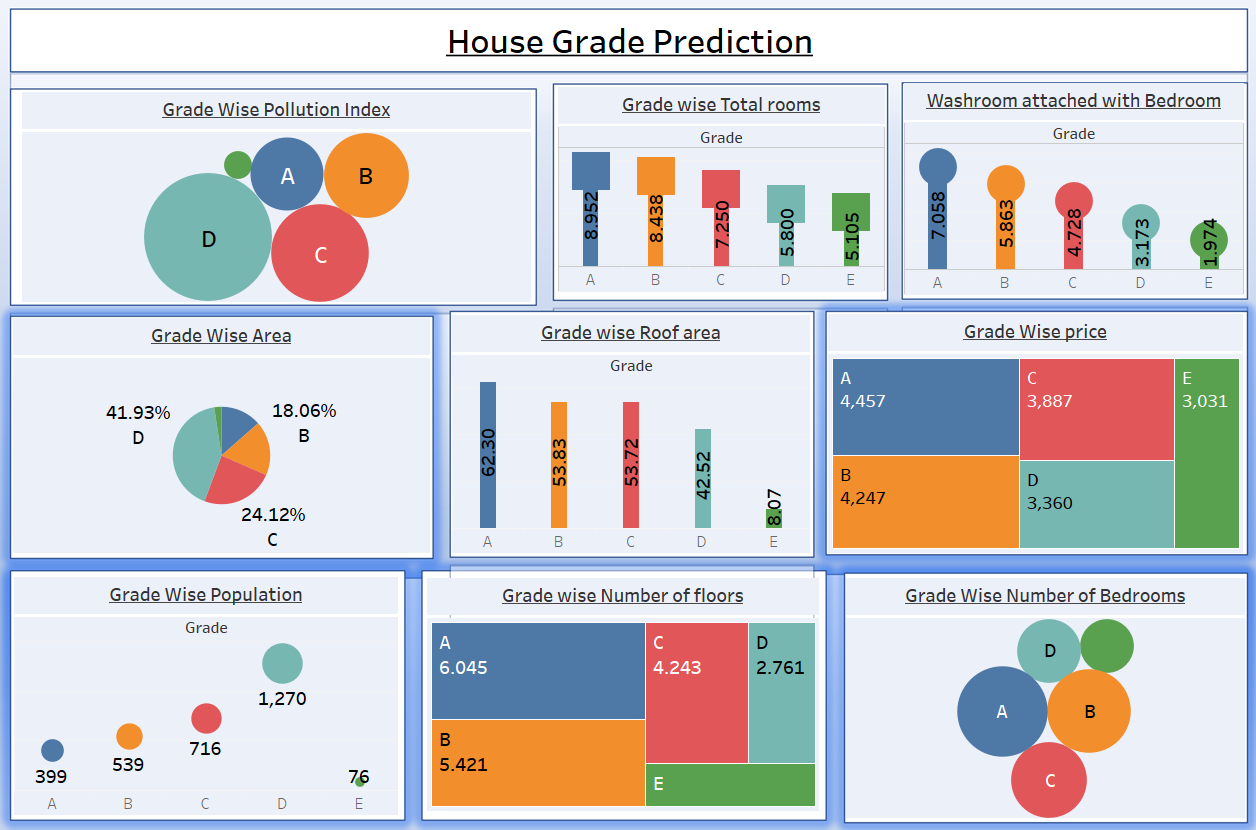

Buisiness Interpretation:- 

As A grade house has high in prices so the facilities such as attached bathroom, number of rooms, number of attached bathroom, roof area, numbers of floors and area are more. As the grades is decreasing the facilities are also decreasing, which in turns to the lower in house prices. 

But Most of the people would like to live in D grade houses because on an average it has 2 floors with 5 rooms including 3 bedrooms which are attached with washrooms

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

obj=df.select_dtypes(include="object")
for i in obj:
    df[i] = le.fit_transform(df[i])

Interpretation:- Converted categorical to numerical using sklearn Label encoder

# Feature Selection

In [10]:
column_correlation = df.corr()
column_correlation

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


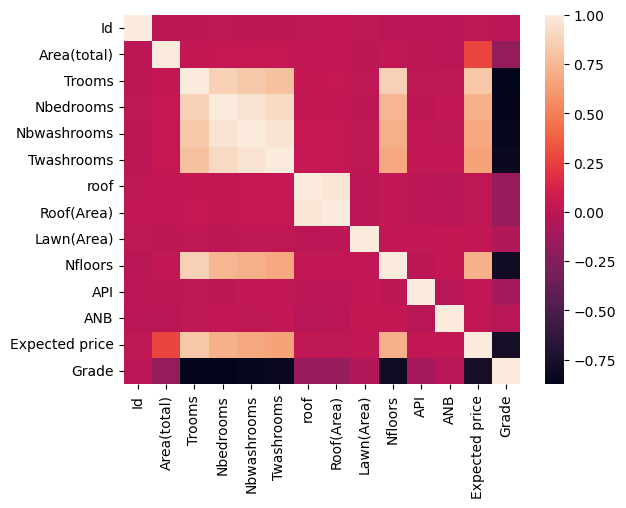

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(column_correlation);
plt.show()

# Spliting The Data

In [12]:
#X=df[["Trooms","Nbedrooms","Nbwashrooms","Twashrooms","Nfloors","Expected price"]]
#y=df[["Grade"]]

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5)
X_train.shape, X_test.shape

((2100, 13), (900, 13))

Interpretation:- Splited the data with 70% as train and 30% as test size

# Scaling the data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Interpretation:- standardize the independent features in a fixed range using minmax scaler

# Feature Extraction

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Interpretation:- Reduced the dimension using Linear Discriminant Analysis into 2 components for getting better machine prediction

# Modelling - Logistic Regression

In [17]:
results, names = list(), list()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(logreg, X,y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results.append(n_score)
names.append('LR')

In [19]:
print("Training score",logreg.score(X_train,y_train))
print("Testing score",logreg.score(X_test,y_test))

Training score 0.9414285714285714
Testing score 0.9211111111111111


In [20]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

print('accuracy         :', accuracy_score(y_test, y_pred))
print('recall           :', recall_score(y_test, y_pred,average='weighted'))
print('f1-score         :', f1_score(y_test, y_pred,average='weighted'))
print('precision        :', precision_score(y_test, y_pred,average='weighted'))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

accuracy         : 0.9211111111111111
recall           : 0.9211111111111111
f1-score         : 0.9172331492255624
precision        : 0.9197770528322642
Confusion Matrix :
 [[ 91   9   0   0   0]
 [ 16 148   5   0   0]
 [  0   3 195  11   0]
 [  0   0   8 386   2]
 [  0   0   0  17   9]]


Interpretation :- Model is performing good with 92% accuracy 

# Modelling -  Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model_NB=classifier.fit(X_train, y_train) 

In [22]:
y_pred = classifier.predict(X_test) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(model_NB, X,y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results.append(n_score)
names.append('NB')

In [23]:
print("Training score",model_NB.score(X_train,y_train))
print("Testing score",model_NB.score(X_test,y_test))

Training score 0.9304761904761905
Testing score 0.9211111111111111


In [24]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

print('accuracy         :', accuracy_score(y_test, y_pred))
print('recall           :', recall_score(y_test, y_pred,average='weighted'))
print('f1-score         :', f1_score(y_test, y_pred,average='weighted'))
print('precision        :', precision_score(y_test, y_pred,average='weighted'))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

accuracy         : 0.9211111111111111
recall           : 0.9211111111111111
f1-score         : 0.9180545548565553
precision        : 0.918944051698484
Confusion Matrix :
 [[ 93   7   0   0   0]
 [ 16 147   6   0   0]
 [  0   4 194  11   0]
 [  0   0   7 385   4]
 [  0   0   0  16  10]]


Interpretation :- Model is performing good with 92% accuracy 

# Modelling - Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(clf, X,y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results.append(n_score)
names.append('DT')

In [27]:
y_pred = clf.predict(X_test)

In [28]:
X_test

array([[-4.66330669,  1.09913971],
       [ 3.81315977,  0.35581855],
       [-6.07325553, -1.4008877 ],
       ...,
       [ 2.45135216,  0.35405677],
       [ 3.46677443, -1.07702405],
       [-0.1158243 ,  1.14672756]])

In [29]:
print("Training score",clf.score(X_train,y_train))
print("Testing score",clf.score(X_test,y_test))

Training score 0.9395238095238095
Testing score 0.9133333333333333


In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

print('accuracy         :', accuracy_score(y_test, y_pred))
print('recall           :', recall_score(y_test, y_pred,average='weighted'))
print('f1-score         :', f1_score(y_test, y_pred,average='weighted'))
print('precision        :', precision_score(y_test, y_pred,average='weighted'))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

accuracy         : 0.9133333333333333
recall           : 0.9133333333333333
f1-score         : 0.9086451773312144
precision        : 0.9131057935027604
Confusion Matrix :
 [[ 95   5   0   0   0]
 [ 23 136  10   0   0]
 [  0   2 195  12   0]
 [  0   0   5 388   3]
 [  0   0   0  18   8]]


Interpretation :- Model is performing good with 91% accuracy and 90% F1-score

# Bagging with Random Forest

In [31]:
 from sklearn.ensemble import RandomForestClassifier


In [32]:
# define the model
model_RF = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(model_RF, X,y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results.append(n_score)
names.append('RF')

In [33]:
model_rf=model_RF.fit(X_train,y_train)
print("Training score",model_rf.score(X_train,y_train))
print("Testing score",model_rf.score(X_test,y_test))

Training score 1.0
Testing score 0.93


In [34]:
y_pred = model_RF.predict(X_test)

In [35]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

print('accuracy         :', accuracy_score(y_test, y_pred))
print('recall           :', recall_score(y_test, y_pred,average='weighted'))
print('f1-score         :', f1_score(y_test, y_pred,average='weighted'))
print('precision        :', precision_score(y_test, y_pred,average='weighted'))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

accuracy         : 0.93
recall           : 0.93
f1-score         : 0.9277950041129802
precision        : 0.9282899178654253
Confusion Matrix :
 [[ 92   8   0   0   0]
 [ 12 150   7   0   0]
 [  0   0 199  10   0]
 [  0   0   8 384   4]
 [  0   0   0  14  12]]


Interpretation :- Bagging is performing better with 92% accuracy in testing and 100% in training

# Boosting with Adaboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
# define the model
model_ADA = AdaBoostClassifier()
# evaluate the model

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(model_ADA, X,y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results.append(n_score)
names.append('Adaboost')

In [38]:
model_ada = model_ADA.fit(X_train,y_train)
print("Training Score",model_ada.score(X_train,y_train))
print("Testing Score",model_ada.score(X_test,y_test))

Training Score 0.8842857142857142
Testing Score 0.8766666666666667


In [39]:
y_pred = model_ada.predict(X_test)

In [40]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

print('accuracy         :', accuracy_score(y_test, y_pred))
print('recall           :', recall_score(y_test, y_pred,average='weighted'))
print('f1-score         :', f1_score(y_test, y_pred,average='weighted'))
print('precision        :', precision_score(y_test, y_pred,average='weighted'))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

accuracy         : 0.8766666666666667
recall           : 0.8766666666666667
f1-score         : 0.8613440899459357
precision        : 0.8706021133591227
Confusion Matrix :
 [[ 99   1   0   0   0]
 [ 55 104  10   0   0]
 [  0   2 195  12   0]
 [  0   0   5 391   0]
 [  0   0   0  26   0]]


Interpretation :- Boosting with Adaboost is performing good with 87% accuracy in Testing and 88% in training

# Stacking

In [41]:
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [42]:
 # get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [43]:
# define the model
model_S = get_stacking()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(model_S, X,y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results.append(n_score)
names.append('stacking')


In [44]:
model_stack=model_S.fit(X_train,y_train)
print("Training Score", model_stack.score(X_train,y_train))
print("Testing Score",model_stack.score(X_test,y_test))

Training Score 0.949047619047619
Testing Score 0.9188888888888889


In [45]:
y_pred = model_stack.predict(X_test)

In [46]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

print('accuracy         :', accuracy_score(y_test, y_pred))
print('recall           :', recall_score(y_test, y_pred,average='weighted'))
print('f1-score         :', f1_score(y_test, y_pred,average='weighted'))
print('precision        :', precision_score(y_test, y_pred,average='weighted'))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))

accuracy         : 0.9188888888888889
recall           : 0.9188888888888889
f1-score         : 0.9153485156357439
precision        : 0.9167346730162265
Confusion Matrix :
 [[ 93   7   0   0   0]
 [ 18 145   6   0   0]
 [  0   2 196  11   0]
 [  0   0   8 384   4]
 [  0   0   0  17   9]]


Interpretation :- Stacking is performing better on comparition to all models with 92% accuracy in testing and 95% in training

In [47]:
import matplotlib.pyplot as pyplot

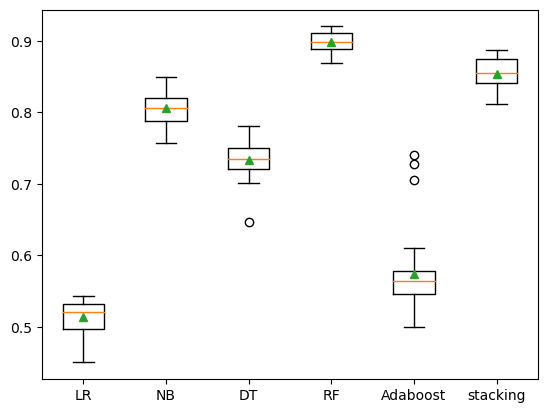

In [48]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Interpretation:- Overall, Stacking is performing better with comparision to all the models and can predict best output